# S&P 500 Portfolio Optimization Project

This notebook demonstrates an end-to-end data science workflow:
- Collecting historical stock data (S&P 500 constituents)  
- Cleaning and preprocessing  
- Calculating returns, volatility, and Sharpe ratios  
- Building a portfolio of optimized tickers  
- Visualizing performance against the S&P 500 ETF (SPY)  
- Exporting results for further SQL analysis  

---


## 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import os

warnings.filterwarnings('ignore')
print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load S&P 500 Tickers
We’ll use a static list of S&P 500 tickers from DataHub (Wikipedia scraping disabled here).  


In [4]:
df = pd.read_csv("https://datahub.io/core/s-and-p-500-companies/r/constituents.csv")
sp500_tickers = df['Symbol'].tolist()
print(f"Loaded {len(sp500_tickers)} tickers from DataHub")

Loaded 503 tickers from DataHub


## 3. Download 5 Years of Price Data
We download data from Yahoo Finance for each ticker, store it in a CSV, and include the ticker symbol for identification.  

In [5]:
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

output_file = r"C:\Users\rcirko\Documents\sp500_prices_all.csv"

if os.path.exists(output_file):
    os.remove(output_file)

for i, ticker in enumerate(sp500_tickers, start=1):
    try:
        print(f"{i}/{len(sp500_tickers)} Downloading {ticker}...")
        df = yf.download(ticker, start=start_date, end=end_date)
        df = df.reset_index()
        df["Ticker"] = ticker
        df.to_csv(output_file, mode='a', header=not os.path.exists(output_file))
    except Exception as e:
        print(f"Error Downloading {ticker}: {e}")

print(f"Finished downloading all tickers! CSV saved to: {output_file}")

1/503 Downloading MMM...


[*********************100%***********************]  1 of 1 completed


2/503 Downloading AOS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

3/503 Downloading ABT...
4/503 Downloading ABBV...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


5/503 Downloading ACN...
6/503 Downloading ADBE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


7/503 Downloading AMD...
8/503 Downloading AES...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

9/503 Downloading AFL...



[*********************100%***********************]  1 of 1 completed


10/503 Downloading A...
11/503 Downloading APD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


12/503 Downloading ABNB...
13/503 Downloading AKAM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


14/503 Downloading ALB...
15/503 Downloading ARE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


16/503 Downloading ALGN...
17/503 Downloading ALLE...


[*********************100%***********************]  1 of 1 completed


18/503 Downloading LNT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


19/503 Downloading ALL...
20/503 Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


21/503 Downloading GOOG...
22/503 Downloading MO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


23/503 Downloading AMZN...
24/503 Downloading AMCR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

25/503 Downloading AEE...
26/503 Downloading AEP...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

27/503 Downloading AXP...



[*********************100%***********************]  1 of 1 completed


28/503 Downloading AIG...
29/503 Downloading AMT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


30/503 Downloading AWK...
31/503 Downloading AMP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

32/503 Downloading AME...



[*********************100%***********************]  1 of 1 completed


33/503 Downloading AMGN...
34/503 Downloading APH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


35/503 Downloading ADI...
36/503 Downloading AON...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


37/503 Downloading APA...
38/503 Downloading APO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


39/503 Downloading AAPL...


[*********************100%***********************]  1 of 1 completed


40/503 Downloading AMAT...
41/503 Downloading APTV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


42/503 Downloading ACGL...
43/503 Downloading ADM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


44/503 Downloading ANET...
45/503 Downloading AJG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


46/503 Downloading AIZ...
47/503 Downloading T...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


48/503 Downloading ATO...
49/503 Downloading ADSK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

50/503 Downloading ADP...



[*********************100%***********************]  1 of 1 completed


51/503 Downloading AZO...
52/503 Downloading AVB...


[*********************100%***********************]  1 of 1 completed


53/503 Downloading AVY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


54/503 Downloading AXON...
55/503 Downloading BKR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

56/503 Downloading BALL...



[*********************100%***********************]  1 of 1 completed


57/503 Downloading BAC...
58/503 Downloading BAX...


[*********************100%***********************]  1 of 1 completed


59/503 Downloading BDX...


[*********************100%***********************]  1 of 1 completed


60/503 Downloading BRK.B...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


61/503 Downloading BBY...
62/503 Downloading TECH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


63/503 Downloading BIIB...
64/503 Downloading BLK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


65/503 Downloading BX...
66/503 Downloading XYZ...


[*********************100%***********************]  1 of 1 completed


67/503 Downloading BK...


[*********************100%***********************]  1 of 1 completed


68/503 Downloading BA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


69/503 Downloading BKNG...
70/503 Downloading BSX...


[*********************100%***********************]  1 of 1 completed


71/503 Downloading BMY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

72/503 Downloading AVGO...



[*********************100%***********************]  1 of 1 completed


73/503 Downloading BR...


[*********************100%***********************]  1 of 1 completed

74/503 Downloading BRO...



[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-09-22 22:04:36.394440 -> 2025-09-21 22:04:36.394440)')


75/503 Downloading BF.B...
76/503 Downloading BLDR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

77/503 Downloading BG...



[*********************100%***********************]  1 of 1 completed

78/503 Downloading BXP...



[*********************100%***********************]  1 of 1 completed

79/503 Downloading CHRW...



[*********************100%***********************]  1 of 1 completed


80/503 Downloading CDNS...
81/503 Downloading CZR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


82/503 Downloading CPT...
83/503 Downloading CPB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


84/503 Downloading COF...
85/503 Downloading CAH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


86/503 Downloading KMX...
87/503 Downloading CCL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


88/503 Downloading CARR...
89/503 Downloading CAT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


90/503 Downloading CBOE...
91/503 Downloading CBRE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


92/503 Downloading CDW...
93/503 Downloading COR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


94/503 Downloading CNC...
95/503 Downloading CNP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

96/503 Downloading CF...



[*********************100%***********************]  1 of 1 completed


97/503 Downloading CRL...
98/503 Downloading SCHW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


99/503 Downloading CHTR...
100/503 Downloading CVX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


101/503 Downloading CMG...
102/503 Downloading CB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


103/503 Downloading CHD...
104/503 Downloading CI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


105/503 Downloading CINF...
106/503 Downloading CTAS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


107/503 Downloading CSCO...
108/503 Downloading C...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


109/503 Downloading CFG...
110/503 Downloading CLX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


111/503 Downloading CME...
112/503 Downloading CMS...


[*********************100%***********************]  1 of 1 completed


113/503 Downloading KO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


114/503 Downloading CTSH...
115/503 Downloading COIN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


116/503 Downloading CL...
117/503 Downloading CMCSA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


118/503 Downloading CAG...


[*********************100%***********************]  1 of 1 completed

119/503 Downloading COP...


120/503 Downloading ED...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


121/503 Downloading STZ...
122/503 Downloading CEG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


123/503 Downloading COO...
124/503 Downloading CPRT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


125/503 Downloading GLW...
126/503 Downloading CPAY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


127/503 Downloading CTVA...
128/503 Downloading CSGP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


129/503 Downloading COST...
130/503 Downloading CTRA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


131/503 Downloading CRWD...
132/503 Downloading CCI...


[*********************100%***********************]  1 of 1 completed


133/503 Downloading CSX...


[*********************100%***********************]  1 of 1 completed


134/503 Downloading CMI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

135/503 Downloading CVS...


136/503 Downloading DHR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

137/503 Downloading DRI...



[*********************100%***********************]  1 of 1 completed


138/503 Downloading DDOG...
139/503 Downloading DVA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


140/503 Downloading DAY...
141/503 Downloading DECK...


[*********************100%***********************]  1 of 1 completed


142/503 Downloading DE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


143/503 Downloading DELL...
144/503 Downloading DAL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

145/503 Downloading DVN...
146/503 Downloading DXCM...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


147/503 Downloading FANG...
148/503 Downloading DLR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


149/503 Downloading DG...
150/503 Downloading DLTR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

151/503 Downloading D...
152/503 Downloading DPZ...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


153/503 Downloading DASH...
154/503 Downloading DOV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


155/503 Downloading DOW...
156/503 Downloading DHI...


[*********************100%***********************]  1 of 1 completed


157/503 Downloading DTE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


158/503 Downloading DUK...
159/503 Downloading DD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

160/503 Downloading EMN...


161/503 Downloading ETN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


162/503 Downloading EBAY...
163/503 Downloading ECL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

164/503 Downloading EIX...



[*********************100%***********************]  1 of 1 completed


165/503 Downloading EW...
166/503 Downloading EA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


167/503 Downloading ELV...
168/503 Downloading EMR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


169/503 Downloading ENPH...
170/503 Downloading ETR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

171/503 Downloading EOG...



[*********************100%***********************]  1 of 1 completed


172/503 Downloading EPAM...
173/503 Downloading EQT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


174/503 Downloading EFX...
175/503 Downloading EQIX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


176/503 Downloading EQR...
177/503 Downloading ERIE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

178/503 Downloading ESS...



[*********************100%***********************]  1 of 1 completed

179/503 Downloading EL...



[*********************100%***********************]  1 of 1 completed


180/503 Downloading EG...
181/503 Downloading EVRG...


[*********************100%***********************]  1 of 1 completed


182/503 Downloading ES...


[*********************100%***********************]  1 of 1 completed


183/503 Downloading EXC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


184/503 Downloading EXE...
185/503 Downloading EXPE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


186/503 Downloading EXPD...
187/503 Downloading EXR...


[*********************100%***********************]  1 of 1 completed


188/503 Downloading XOM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


189/503 Downloading FFIV...
190/503 Downloading FDS...


[*********************100%***********************]  1 of 1 completed


191/503 Downloading FICO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


192/503 Downloading FAST...
193/503 Downloading FRT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


194/503 Downloading FDX...


[*********************100%***********************]  1 of 1 completed


195/503 Downloading FIS...
196/503 Downloading FITB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


197/503 Downloading FSLR...
198/503 Downloading FE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


199/503 Downloading FI...
200/503 Downloading F...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


201/503 Downloading FTNT...
202/503 Downloading FTV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


203/503 Downloading FOXA...
204/503 Downloading FOX...


[*********************100%***********************]  1 of 1 completed


205/503 Downloading BEN...


[*********************100%***********************]  1 of 1 completed


206/503 Downloading FCX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


207/503 Downloading GRMN...
208/503 Downloading IT...


[*********************100%***********************]  1 of 1 completed


209/503 Downloading GE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


210/503 Downloading GEHC...
211/503 Downloading GEV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


212/503 Downloading GEN...
213/503 Downloading GNRC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

214/503 Downloading GD...



[*********************100%***********************]  1 of 1 completed

215/503 Downloading GIS...



[*********************100%***********************]  1 of 1 completed

216/503 Downloading GM...



[*********************100%***********************]  1 of 1 completed

217/503 Downloading GPC...
218/503 Downloading GILD...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


219/503 Downloading GPN...
220/503 Downloading GL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


221/503 Downloading GDDY...
222/503 Downloading GS...


[*********************100%***********************]  1 of 1 completed


223/503 Downloading HAL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


224/503 Downloading HIG...
225/503 Downloading HAS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


226/503 Downloading HCA...
227/503 Downloading DOC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


228/503 Downloading HSIC...
229/503 Downloading HSY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


230/503 Downloading HPE...
231/503 Downloading HLT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


232/503 Downloading HOLX...
233/503 Downloading HD...


[*********************100%***********************]  1 of 1 completed


234/503 Downloading HON...


[*********************100%***********************]  1 of 1 completed


235/503 Downloading HRL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


236/503 Downloading HST...
237/503 Downloading HWM...


[*********************100%***********************]  1 of 1 completed


238/503 Downloading HPQ...


[*********************100%***********************]  1 of 1 completed


239/503 Downloading HUBB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


240/503 Downloading HUM...
241/503 Downloading HBAN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

242/503 Downloading HII...


243/503 Downloading IBM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


244/503 Downloading IEX...
245/503 Downloading IDXX...


[*********************100%***********************]  1 of 1 completed


246/503 Downloading ITW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


247/503 Downloading INCY...
248/503 Downloading IR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


249/503 Downloading PODD...
250/503 Downloading INTC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


251/503 Downloading ICE...
252/503 Downloading IFF...


[*********************100%***********************]  1 of 1 completed


253/503 Downloading IP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

254/503 Downloading IPG...



[*********************100%***********************]  1 of 1 completed


255/503 Downloading INTU...
256/503 Downloading ISRG...


[*********************100%***********************]  1 of 1 completed


257/503 Downloading IVZ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


258/503 Downloading INVH...


[*********************100%***********************]  1 of 1 completed


259/503 Downloading IQV...
260/503 Downloading IRM...


[*********************100%***********************]  1 of 1 completed


261/503 Downloading JBHT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


262/503 Downloading JBL...
263/503 Downloading JKHY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

264/503 Downloading J...


265/503 Downloading JNJ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


266/503 Downloading JCI...
267/503 Downloading JPM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

268/503 Downloading K...



[*********************100%***********************]  1 of 1 completed


269/503 Downloading KVUE...
270/503 Downloading KDP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

271/503 Downloading KEY...


272/503 Downloading KEYS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

273/503 Downloading KMB...



[*********************100%***********************]  1 of 1 completed


274/503 Downloading KIM...
275/503 Downloading KMI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


276/503 Downloading KKR...
277/503 Downloading KLAC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


278/503 Downloading KHC...
279/503 Downloading KR...


[*********************100%***********************]  1 of 1 completed


280/503 Downloading LHX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


281/503 Downloading LH...
282/503 Downloading LRCX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


283/503 Downloading LW...
284/503 Downloading LVS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


285/503 Downloading LDOS...
286/503 Downloading LEN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

287/503 Downloading LII...



[*********************100%***********************]  1 of 1 completed

288/503 Downloading LLY...



[*********************100%***********************]  1 of 1 completed


289/503 Downloading LIN...
290/503 Downloading LYV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


291/503 Downloading LKQ...
292/503 Downloading LMT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


293/503 Downloading L...
294/503 Downloading LOW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


295/503 Downloading LULU...
296/503 Downloading LYB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


297/503 Downloading MTB...
298/503 Downloading MPC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


299/503 Downloading MKTX...
300/503 Downloading MAR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

301/503 Downloading MMC...



[*********************100%***********************]  1 of 1 completed


302/503 Downloading MLM...
303/503 Downloading MAS...


[*********************100%***********************]  1 of 1 completed


304/503 Downloading MA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

305/503 Downloading MTCH...
306/503 Downloading MKC...



[*********************100%***********************]  1 of 1 completed


307/503 Downloading MCD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


308/503 Downloading MCK...
309/503 Downloading MDT...


[*********************100%***********************]  1 of 1 completed


310/503 Downloading MRK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


311/503 Downloading META...
312/503 Downloading MET...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


313/503 Downloading MTD...
314/503 Downloading MGM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

315/503 Downloading MCHP...



[*********************100%***********************]  1 of 1 completed

316/503 Downloading MU...



[*********************100%***********************]  1 of 1 completed


317/503 Downloading MSFT...
318/503 Downloading MAA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


319/503 Downloading MRNA...
320/503 Downloading MHK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


321/503 Downloading MOH...
322/503 Downloading TAP...


[*********************100%***********************]  1 of 1 completed


323/503 Downloading MDLZ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


324/503 Downloading MPWR...
325/503 Downloading MNST...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


326/503 Downloading MCO...
327/503 Downloading MS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

328/503 Downloading MOS...


329/503 Downloading MSI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


330/503 Downloading MSCI...
331/503 Downloading NDAQ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

332/503 Downloading NTAP...
333/503 Downloading NFLX...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


334/503 Downloading NEM...
335/503 Downloading NWSA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


336/503 Downloading NWS...
337/503 Downloading NEE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


338/503 Downloading NKE...
339/503 Downloading NI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


340/503 Downloading NDSN...
341/503 Downloading NSC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


342/503 Downloading NTRS...
343/503 Downloading NOC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


344/503 Downloading NCLH...
345/503 Downloading NRG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


346/503 Downloading NUE...
347/503 Downloading NVDA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


348/503 Downloading NVR...
349/503 Downloading NXPI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


350/503 Downloading ORLY...
351/503 Downloading OXY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


352/503 Downloading ODFL...
353/503 Downloading OMC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


354/503 Downloading ON...
355/503 Downloading OKE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

356/503 Downloading ORCL...



[*********************100%***********************]  1 of 1 completed

357/503 Downloading OTIS...
358/503 Downloading PCAR...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


359/503 Downloading PKG...
360/503 Downloading PLTR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


361/503 Downloading PANW...
362/503 Downloading PSKY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

363/503 Downloading PH...



[*********************100%***********************]  1 of 1 completed


364/503 Downloading PAYX...
365/503 Downloading PAYC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


366/503 Downloading PYPL...
367/503 Downloading PNR...


[*********************100%***********************]  1 of 1 completed


368/503 Downloading PEP...


[*********************100%***********************]  1 of 1 completed


369/503 Downloading PFE...


[*********************100%***********************]  1 of 1 completed


370/503 Downloading PCG...


[*********************100%***********************]  1 of 1 completed


371/503 Downloading PM...


[*********************100%***********************]  1 of 1 completed


372/503 Downloading PSX...


[*********************100%***********************]  1 of 1 completed


373/503 Downloading PNW...


[*********************100%***********************]  1 of 1 completed


374/503 Downloading PNC...


[*********************100%***********************]  1 of 1 completed


375/503 Downloading POOL...


[*********************100%***********************]  1 of 1 completed


376/503 Downloading PPG...


[*********************100%***********************]  1 of 1 completed


377/503 Downloading PPL...


[*********************100%***********************]  1 of 1 completed


378/503 Downloading PFG...


[*********************100%***********************]  1 of 1 completed


379/503 Downloading PG...


[*********************100%***********************]  1 of 1 completed


380/503 Downloading PGR...


[*********************100%***********************]  1 of 1 completed


381/503 Downloading PLD...


[*********************100%***********************]  1 of 1 completed


382/503 Downloading PRU...


[*********************100%***********************]  1 of 1 completed


383/503 Downloading PEG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


384/503 Downloading PTC...
385/503 Downloading PSA...


[*********************100%***********************]  1 of 1 completed


386/503 Downloading PHM...


[*********************100%***********************]  1 of 1 completed


387/503 Downloading PWR...


[*********************100%***********************]  1 of 1 completed


388/503 Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


389/503 Downloading DGX...


[*********************100%***********************]  1 of 1 completed


390/503 Downloading RL...


[*********************100%***********************]  1 of 1 completed


391/503 Downloading RJF...


[*********************100%***********************]  1 of 1 completed


392/503 Downloading RTX...


[*********************100%***********************]  1 of 1 completed


393/503 Downloading O...


[*********************100%***********************]  1 of 1 completed


394/503 Downloading REG...


[*********************100%***********************]  1 of 1 completed


395/503 Downloading REGN...


[*********************100%***********************]  1 of 1 completed


396/503 Downloading RF...


[*********************100%***********************]  1 of 1 completed


397/503 Downloading RSG...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

398/503 Downloading RMD...


399/503 Downloading RVTY...


[*********************100%***********************]  1 of 1 completed


400/503 Downloading ROK...


[*********************100%***********************]  1 of 1 completed


401/503 Downloading ROL...


[*********************100%***********************]  1 of 1 completed


402/503 Downloading ROP...


[*********************100%***********************]  1 of 1 completed


403/503 Downloading ROST...


[*********************100%***********************]  1 of 1 completed


404/503 Downloading RCL...


[*********************100%***********************]  1 of 1 completed


405/503 Downloading SPGI...


[*********************100%***********************]  1 of 1 completed


406/503 Downloading CRM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


407/503 Downloading SBAC...
408/503 Downloading SLB...


[*********************100%***********************]  1 of 1 completed


409/503 Downloading STX...


[*********************100%***********************]  1 of 1 completed


410/503 Downloading SRE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


411/503 Downloading NOW...
412/503 Downloading SHW...


[*********************100%***********************]  1 of 1 completed


413/503 Downloading SPG...


[*********************100%***********************]  1 of 1 completed


414/503 Downloading SWKS...


[*********************100%***********************]  1 of 1 completed


415/503 Downloading SJM...


[*********************100%***********************]  1 of 1 completed


416/503 Downloading SW...


[*********************100%***********************]  1 of 1 completed


417/503 Downloading SNA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


418/503 Downloading SOLV...
419/503 Downloading SO...


[*********************100%***********************]  1 of 1 completed


420/503 Downloading LUV...


[*********************100%***********************]  1 of 1 completed


421/503 Downloading SWK...


[*********************100%***********************]  1 of 1 completed


422/503 Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


423/503 Downloading STT...


[*********************100%***********************]  1 of 1 completed


424/503 Downloading STLD...


[*********************100%***********************]  1 of 1 completed


425/503 Downloading STE...


[*********************100%***********************]  1 of 1 completed


426/503 Downloading SYK...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

427/503 Downloading SMCI...


428/503 Downloading SYF...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


429/503 Downloading SNPS...
430/503 Downloading SYY...


[*********************100%***********************]  1 of 1 completed


431/503 Downloading TMUS...


[*********************100%***********************]  1 of 1 completed


432/503 Downloading TROW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


433/503 Downloading TTWO...
434/503 Downloading TPR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

435/503 Downloading TRGP...


436/503 Downloading TGT...


[*********************100%***********************]  1 of 1 completed


437/503 Downloading TEL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


438/503 Downloading TDY...
439/503 Downloading TER...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


440/503 Downloading TSLA...
441/503 Downloading TXN...


[*********************100%***********************]  1 of 1 completed


442/503 Downloading TPL...


[*********************100%***********************]  1 of 1 completed


443/503 Downloading TXT...


[*********************100%***********************]  1 of 1 completed


444/503 Downloading TMO...


[*********************100%***********************]  1 of 1 completed


445/503 Downloading TJX...


[*********************100%***********************]  1 of 1 completed


446/503 Downloading TKO...


[*********************100%***********************]  1 of 1 completed


447/503 Downloading TTD...


[*********************100%***********************]  1 of 1 completed


448/503 Downloading TSCO...


[*********************100%***********************]  1 of 1 completed


449/503 Downloading TT...


[*********************100%***********************]  1 of 1 completed


450/503 Downloading TDG...


[*********************100%***********************]  1 of 1 completed


451/503 Downloading TRV...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

452/503 Downloading TRMB...
453/503 Downloading TFC...



[*********************100%***********************]  1 of 1 completed


454/503 Downloading TYL...


[*********************100%***********************]  1 of 1 completed


455/503 Downloading TSN...


[*********************100%***********************]  1 of 1 completed


456/503 Downloading USB...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

457/503 Downloading UBER...


458/503 Downloading UDR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

459/503 Downloading ULTA...


460/503 Downloading UNP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

461/503 Downloading UAL...


462/503 Downloading UPS...


[*********************100%***********************]  1 of 1 completed


463/503 Downloading URI...


[*********************100%***********************]  1 of 1 completed


464/503 Downloading UNH...


[*********************100%***********************]  1 of 1 completed


465/503 Downloading UHS...


[*********************100%***********************]  1 of 1 completed


466/503 Downloading VLO...


[*********************100%***********************]  1 of 1 completed


467/503 Downloading VTR...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


468/503 Downloading VLTO...
469/503 Downloading VRSN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

470/503 Downloading VRSK...


471/503 Downloading VZ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


472/503 Downloading VRTX...
473/503 Downloading VTRS...


[*********************100%***********************]  1 of 1 completed


474/503 Downloading VICI...


[*********************100%***********************]  1 of 1 completed


475/503 Downloading V...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


476/503 Downloading VST...
477/503 Downloading VMC...


[*********************100%***********************]  1 of 1 completed


478/503 Downloading WRB...


[*********************100%***********************]  1 of 1 completed


479/503 Downloading GWW...


[*********************100%***********************]  1 of 1 completed


480/503 Downloading WAB...


[*********************100%***********************]  1 of 1 completed


481/503 Downloading WBA...


[*********************100%***********************]  1 of 1 completed


482/503 Downloading WMT...


[*********************100%***********************]  1 of 1 completed


483/503 Downloading DIS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


484/503 Downloading WBD...
485/503 Downloading WM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


486/503 Downloading WAT...
487/503 Downloading WEC...


[*********************100%***********************]  1 of 1 completed


488/503 Downloading WFC...


[*********************100%***********************]  1 of 1 completed


489/503 Downloading WELL...


[*********************100%***********************]  1 of 1 completed


490/503 Downloading WST...


[*********************100%***********************]  1 of 1 completed


491/503 Downloading WDC...


[*********************100%***********************]  1 of 1 completed


492/503 Downloading WY...


[*********************100%***********************]  1 of 1 completed


493/503 Downloading WSM...


[*********************100%***********************]  1 of 1 completed


494/503 Downloading WMB...


[*********************100%***********************]  1 of 1 completed


495/503 Downloading WTW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


496/503 Downloading WDAY...
497/503 Downloading WYNN...


[*********************100%***********************]  1 of 1 completed


498/503 Downloading XEL...


[*********************100%***********************]  1 of 1 completed


499/503 Downloading XYL...


[*********************100%***********************]  1 of 1 completed


500/503 Downloading YUM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

501/503 Downloading ZBRA...


502/503 Downloading ZBH...


[*********************100%***********************]  1 of 1 completed


503/503 Downloading ZTS...


[*********************100%***********************]  1 of 1 completed

Finished downloading all tickers! CSV saved to: C:\Users\rcirko\Documents\sp500_prices_all.csv


## 4. Load and Inspect Data
Check for missing values, duplicates, and data types.  


In [6]:
file_path = "/content/C:\\Users\\rcirko\\Documents\\sp500_prices_all.csv"
df = pd.read_csv(file_path, skiprows=[1])

print(df.head())
print(df.info())
print("Number of unique tickers:", df['Ticker'].nunique())

# Clean missing values
df = df.dropna(subset=['Date', 'Ticker'])
df["Date"] = pd.to_datetime(df["Date"])

# Convert numeric columns
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

   Price        Date       Close        High         Low        Open   Volume  \
0      0  2020-09-23  110.448143  113.723296  110.178092  112.532332  2688847   
1      1  2020-09-24  111.078224  112.144555  109.451041  110.371953  1877361   
2      2  2020-09-25  110.974396  111.466013  109.998073  110.309673  2330884   
3      3  2020-09-28  111.936852  113.654056  111.708348  112.172279  2509806   
4      4  2020-09-29  110.655869  112.137645  109.942673  111.943766  2400013   

  Ticker  
0    MMM  
1    MMM  
2    MMM  
3    MMM  
4    MMM  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623813 entries, 0 to 623812
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Price   623813 non-null  int64  
 1   Date    623813 non-null  object 
 2   Close   623813 non-null  float64
 3   High    623813 non-null  float64
 4   Low     623813 non-null  float64
 5   Open    623813 non-null  float64
 6   Volume  623813 non-null  int

## 5. Daily Returns
Calculate daily returns for each ticker and summarize mean and volatility.  

In [8]:
df["Daily_Return"] = df.groupby("Ticker")["Close"].pct_change()
returns_daily = df.groupby("Ticker")["Daily_Return"].agg(["mean", "std"])

print("Top tickers by daily mean return:")
print(returns_daily.sort_values(by='mean', ascending=False).head())

print("\nLowest volatility tickers (daily):")
print(returns_daily.sort_values(by='std', ascending=True).head())

Top tickers by daily mean return:
            mean       std
Ticker                    
GEV     0.004795  0.033859
SMCI    0.003587  0.050879
PLTR    0.003367  0.045276
CEG     0.002755  0.031004
NVDA    0.002679  0.032937

Lowest volatility tickers (daily):
            mean       std
Ticker                    
KO      0.000429  0.010225
JNJ     0.000329  0.010620
PG      0.000265  0.010835
MCD     0.000422  0.010841
CL      0.000216  0.011059


## 6. Annualized Metrics
Convert daily mean and std into **annualized return, volatility, and Sharpe ratio**.  

In [9]:
returns_annual = returns_daily.copy()
returns_annual["Annual_Return"] = (1 + returns_annual["mean"])**252 - 1
returns_annual["Annual_Volatility"] = returns_annual["std"] * (252 ** 0.5)
returns_annual["Sharpe_Ratio"] = returns_annual["Annual_Return"] / returns_annual["Annual_Volatility"]

returns_annual.head()

,mean,std,Annual_Return,Annual_Volatility,Sharpe_Ratio
Ticker,,,,,
A,0.000397,0.017805,0.105158,0.282647,0.372046
AAPL,0.000847,0.018071,0.237690,0.286862,0.828587
ABBV,0.001011,0.014232,0.290081,0.225921,1.283992
ABNB,0.000347,0.030230,0.091233,0.479887,0.190113
ABT,0.000392,0.013870,0.103757,0.220182,0.471234


## 7. Risk vs Reward Scatter Plot
Plot annualized return vs volatility, colored by Sharpe ratio.  

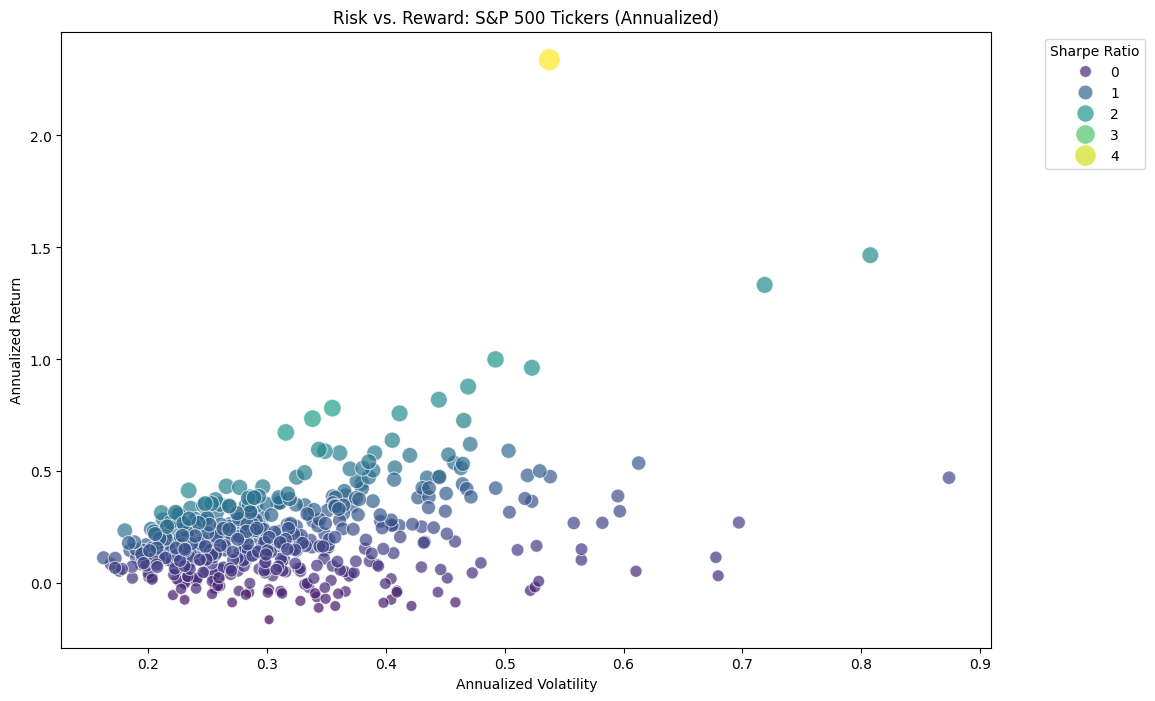

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=returns_annual,
    x='Annual_Volatility',
    y='Annual_Return',
    hue='Sharpe_Ratio',
    palette='viridis',
    size='Sharpe_Ratio',
    sizes=(50, 250),
    alpha=0.7
)
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk vs. Reward: S&P 500 Tickers (Annualized)")
plt.legend(title='Sharpe Ratio', bbox_to_anchor=(1.05,1), loc=2)
plt.show()

## 8. Portfolio Construction (Top 10 Sharpe Ratio)
Select the top 10 stocks based on Sharpe ratio, assign weights, and calculate expected portfolio return & volatility.  


In [12]:
top_tickers = returns_annual.sort_values(by='Sharpe_Ratio', ascending=False).head(10)
top_ticker_list = top_tickers.index.tolist()

latest_prices = df[df['Ticker'].isin(top_ticker_list)].groupby('Ticker')['Close'].last().reset_index()
latest_prices.rename(columns={'Close': 'Last_Close'}, inplace=True)

portfolio_summary = pd.merge(returns_annual.reset_index(), latest_prices, on='Ticker')
portfolio_summary['Portfolio_Weight'] = portfolio_summary['Sharpe_Ratio'] / portfolio_summary['Sharpe_Ratio'].sum()

portfolio_return = (portfolio_summary['Portfolio_Weight'] * portfolio_summary['Annual_Return']).sum()
portfolio_volatility = np.sqrt(((portfolio_summary['Portfolio_Weight'] * portfolio_summary['Annual_Volatility'])**2).sum())

print("Portfolio Summary:")
print(portfolio_summary[['Ticker','Annual_Return','Annual_Volatility','Sharpe_Ratio','Portfolio_Weight']])
print(f"\nPortfolio Annual Return: {portfolio_return:.3f}")
print(f"Portfolio Annual Volatility: {portfolio_volatility:.3f}")


Portfolio Summary:
  Ticker  Annual_Return  Annual_Volatility  Sharpe_Ratio  Portfolio_Weight
0   ANET       0.820141           0.444518      1.845012          0.083282
1   AVGO       0.758936           0.411436      1.844601          0.083263
2    CEG       1.000100           0.492170      2.032023          0.091723
3     GE       0.673923           0.315733      2.134470          0.096348
4    GEV       2.338267           0.537497      4.350292          0.196368
5    HWM       0.735436           0.338168      2.174766          0.098167
6   NVDA       0.962685           0.522859      1.841195          0.083110
7   PLTR       1.332614           0.718736      1.854106          0.083693
8   TRGP       0.782421           0.354898      2.204636          0.099515
9    VST       0.878653           0.469194      1.872683          0.084531

Portfolio Annual Return: 1.163
Portfolio Annual Volatility: 0.161


## 9. Portfolio Performance Over Time
* Visualize portoflio selection amongst S&P 500 stocks <br>
* Compute daily and cumulative returns for the portfolio.  


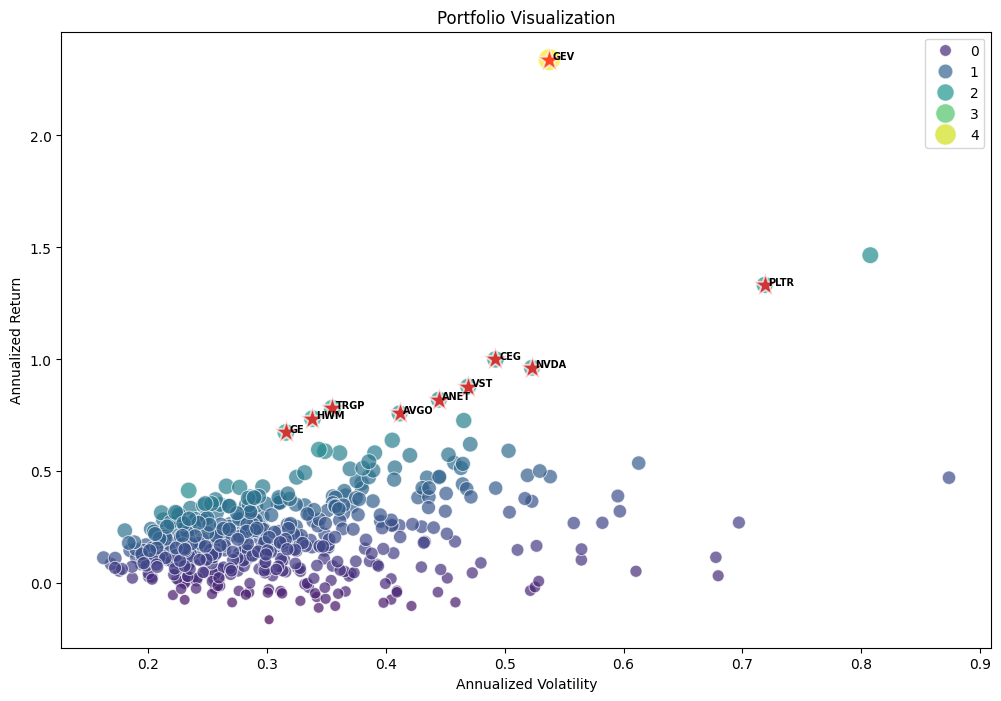

In [17]:
# Original Scatter Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = returns_annual,
    x = 'Annual_Volatility',
    y = 'Annual_Return',
    hue = 'Sharpe_Ratio',
    palette = 'viridis',
    size = 'Sharpe_Ratio',
    sizes = (50, 250),
    alpha = 0.7
)

# Labels and Title
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Portfolio Visualization")
plt.legend(title='Sharpe Ratio', bbox_to_anchor=(1.05,1), loc=2)

# Portfolio Scatter Plot
sns.scatterplot(
    data = returns_annual[returns_annual.index.isin(top_ticker_list)],
    x = 'Annual_Volatility',
    y = 'Annual_Return',
    color='red',
    marker='*',
    s=300,
    alpha = 0.7
)
for index, row in returns_annual[returns_annual.index.isin(top_ticker_list)].iterrows():
  x = row['Annual_Volatility']
  y = row['Annual_Return']
  label = index
  plt.text(x + 0.003, y + 0, label, fontsize=7, fontweight='bold')

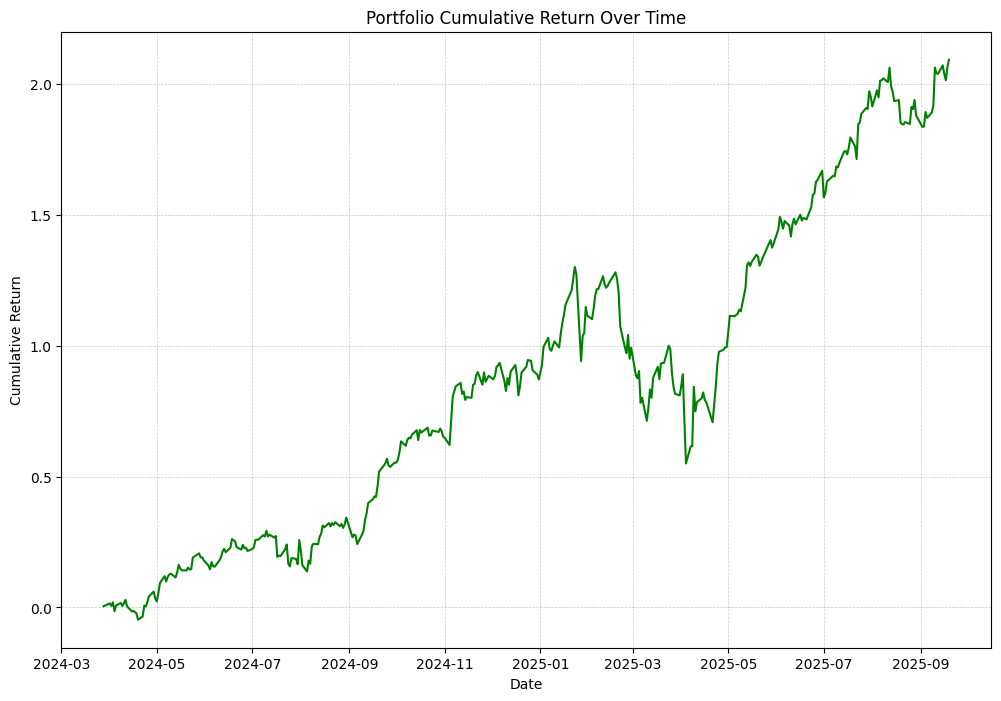

In [13]:
filtered_df = df[df['Ticker'].isin(top_ticker_list)][['Ticker', 'Date', 'Close']]
pivoted_df = filtered_df.pivot(index='Date', columns='Ticker', values='Close')
pivoted_daily_returns = pivoted_df.pct_change().dropna()

weights = portfolio_summary.set_index('Ticker')['Portfolio_Weight']
portfolio_daily_returns = pivoted_daily_returns.mul(weights, axis=1).sum(axis=1).to_frame(name='Daily_Returns')
portfolio_daily_returns['Cum_Return'] = (1 + portfolio_daily_returns['Daily_Returns']).cumprod() - 1

plt.figure(figsize=(12,8))
sns.lineplot(data=portfolio_daily_returns, x='Date', y='Cum_Return', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio Cumulative Return Over Time')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


## 10. Benchmark vs SPY ETF
Compare portfolio returns to the S&P 500 ETF (SPY).  


[*********************100%***********************]  1 of 1 completed


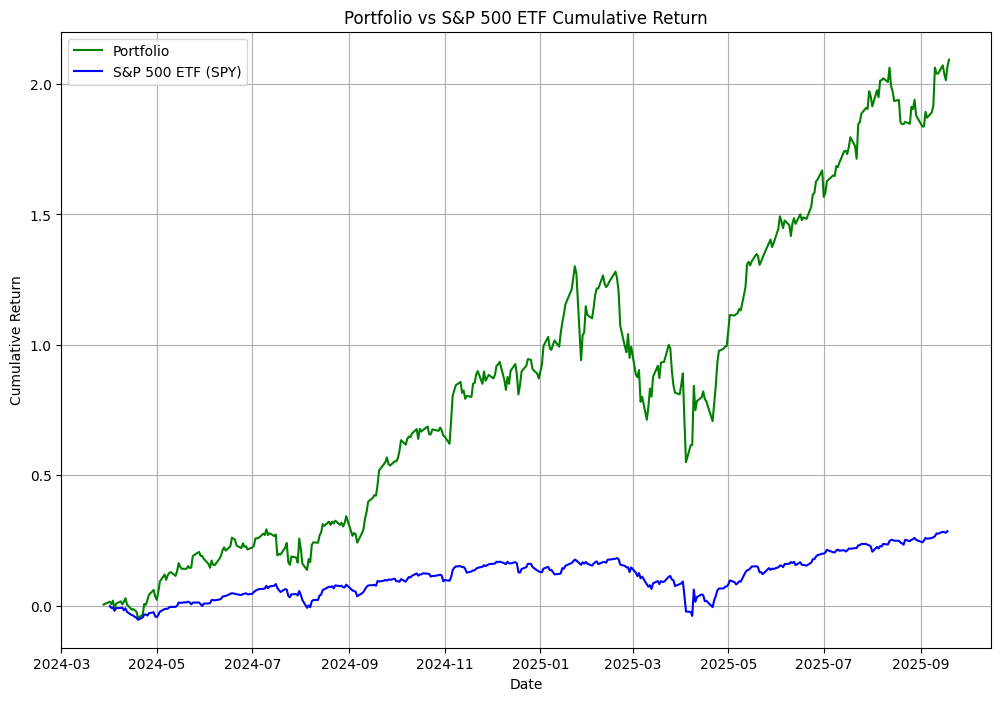

In [18]:
spy = yf.download("SPY", start=portfolio_daily_returns.index.min(), end=portfolio_daily_returns.index.max())
spy_price = spy[['Adj Close']].rename(columns={'Adj Close': 'SPY'}) if 'Adj Close' in spy.columns else spy[['Close']].rename(columns={'Close': 'SPY'})
spy_price['SPY_Daily_Return'] = spy_price['SPY'].pct_change()
spy_price['SPY_Cum_Return'] = (1 + spy_price['SPY_Daily_Return']).cumprod() - 1
spy_price = spy_price.dropna().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(data=portfolio_daily_returns.reset_index(), x='Date', y='Cum_Return', label='Portfolio', color='green')
sns.lineplot(data=spy_price, x='Date', y='SPY_Cum_Return', label='S&P 500 ETF (SPY)', color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs S&P 500 ETF Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()


## 11. Export Results for SQL
Save portfolio summary and performance data to CSV for further SQL queries.  


In [15]:
portfolio_summary.to_csv('portfolio_summary.csv', index=False)
portfolio_daily_returns.to_csv('portfolio_daily_returns.csv', index=True)
spy_price.to_csv('spy_price.csv', index=True)

print("Exported portfolio summary, daily returns, and SPY benchmark for SQL analysis.")

Exported portfolio summary, daily returns, and SPY benchmark for SQL analysis.
